## Supply-Demand Analysis

This notebook contains a series of visualizations to capture and describe the development of supply and demand for renewable energy markets.   
It's produced as a complementary component to this abatement project.

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


% matplotlib inline

In [140]:
patents = pd.read_excel('./Data/Original/patents.xlsx', index_col='Office')
abatement = pd.read_csv('./Data/abatement_calculations.csv')

In [141]:
patents_no_na = patents.dropna(how='all')

In [142]:
contained_nans = []
for i in patents.T.columns:
    if i in patents_no_na.T.columns:
        pass
    else:
        contained_nans.append(i)
        

In [143]:
contained_nans

['Africa']

In [144]:
patents_no_na.shape

(81, 27)

In [145]:
patents_no_na.T.isnull().sum().sort_values(ascending=False)[0:15]

Office
Mexico           26
Ireland          26
Brazil           26
North America    26
Turkey           25
Germany          25
Spain            25
Philippines      24
NaN              24
Malaysia         24
Zimbabwe         24
Asia             21
Slovakia         21
Singapore        20
Ukraine          19
dtype: int64

In [146]:
abatement = abatement[0:37]

In [182]:
top_ten = abatement.sort_values('2014', ascending=False)[0:14].country
top_ten.drop([11, 8, 4, 18], inplace=True)
#had to drop Brazil, India, Colombia, and Mexico for null and 0.0 values.
top_ten

7              China
22            Norway
5             Canada
35     United States
10           Germany
14             Japan
13             Italy
28             Spain
34    United Kingdom
2          Australia
Name: country, dtype: object

In [199]:
for i in top_ten:
    print(f'{i} | {min(patents.T[i])} | {max(patents.T[i])} | {np.std(patents.T[i])}')

China | 85.0 | 458.0 | 90.2732629450353
Norway | 1356.0 | 2944.0 | 482.626041306931
Canada | 1.0 | 36.0 | 8.36676421827608
United States | 47.0 | 129.0 | 20.219780072316304
Germany | 216.0 | 297.0 | 40.5
Japan | 1.0 | 178.0 | 48.80004553731937
Italy | 1.0 | 30.0 | 8.607490278175682
Spain | 1057.0 | 1207.0 | 75.0
United Kingdom | nan | nan | 38.73526884677037
Australia | 1003.0 | 13980.0 | 3769.6047181552794


/Users/sonyahseiden/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/sonyahseiden/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/sonyahseiden/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/sonyahseiden/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


ValueError: cannot convert float NaN to integer

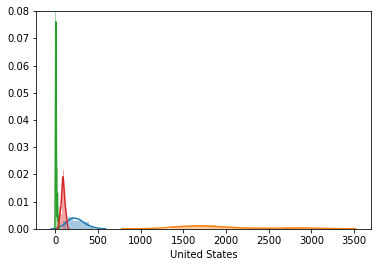

In [204]:
for i in top_ten:
    sns.distplot(patents.loc[i]);